<a href="https://colab.research.google.com/github/thor4/neuralnets/blob/master/projects/1-CNN/step6-generate_figure-cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize results

## 1: Load confidence & accuracy results
Run the cell to download a zip file from OSF then extract 30 excel spreadsheets containing results for each of the 9 confidence accuracy pairs into the current directory.

In [1]:
# @title Download results

import requests, os
from zipfile import ZipFile

print("Start downloading and unzipping confidence & accuracy results for 30 models...")
name = 'van_gabor-models-results'
fname = f"{name}.zip"
url = f"https://osf.io/9fzgm/download" #osf share link
r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as fh:
  fh.write(r.content) #download file

with ZipFile(fname, 'r') as zfile:
  zfile.extractall() #extract contents

if os.path.exists(fname):
  os.remove(fname) #delete zip file
else:
  print(f"The file {fname} does not exist")

print("Download completed.")

Start downloading and unzipping confidence & accuracy results for 30 models...
Download completed.


These were the average confidence and accuracy results of the 30 iterations of the vanilla Gabor model. It was trained specifically for the Gabor classifaction task. 

Load necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from scipy.stats import sem
import matplotlib.pyplot as plt
import matplotlib

In [14]:
model0 = pd.read_excel('van_gabor-model_0-results.xlsx', index_col=None)

In [15]:
model0

,Tilt,Contrast,Accuracy,Confidence
0,0.0500,0.30,0.56325,0.928337
1,NaN,0.45,0.58675,0.982853
2,NaN,1.00,0.69125,1.106592
3,0.1313,0.30,0.63825,0.977220
4,NaN,0.45,0.70950,1.100657
5,NaN,1.00,0.90900,1.755770
6,0.2125,0.30,0.74425,1.082637
7,NaN,0.45,0.83100,1.367617
8,NaN,1.00,0.97825,2.615548


In [16]:
tilts = [0.0500, 0.0500, 0.0500, 0.1313, 0.1313, 0.1313, 0.2125, 0.2125, 0.2125]
model0['Tilt']=tilts
model0

,Tilt,Contrast,Accuracy,Confidence
0,0.0500,0.30,0.56325,0.928337
1,0.0500,0.45,0.58675,0.982853
2,0.0500,1.00,0.69125,1.106592
3,0.1313,0.30,0.63825,0.977220
4,0.1313,0.45,0.70950,1.100657
5,0.1313,1.00,0.90900,1.755770
6,0.2125,0.30,0.74425,1.082637
7,0.2125,0.45,0.83100,1.367617
8,0.2125,1.00,0.97825,2.615548


In [24]:
model0.groupby(['Contrast']).mean()['Accuracy'] #avg acc across tilts


Contrast
0.30    0.648583
0.45    0.709083
1.00    0.859500
Name: Accuracy, dtype: float64

In [25]:
model0.groupby(['Tilt']).mean()['Accuracy'] #avg acc across contrasts

Tilt
0.0500    0.613750
0.1313    0.752250
0.2125    0.851167
Name: Accuracy, dtype: float64

In [30]:
t = model0.groupby(['Contrast']).mean()['Confidence'] #avg conf across tilts
t

Contrast
0.30    0.996065
0.45    1.150376
1.00    1.825970
Name: Confidence, dtype: float64

In [37]:
t[1]-t[0.3] #high contrast - low contrast

0.8299051578349124

In [27]:
model0.groupby(['Tilt']).mean()['Confidence'] #avg conf across contrasts

Tilt
0.0500    1.005928
0.1313    1.277882
0.2125    1.688601
Name: Confidence, dtype: float64

Let's stack results from all 30 models into the `df_van_gabor` dataframe. Additionally, we will make a new dataframe for figure 1d calculating the difference in accuracy across tilts between contrasts 3 and 1, difference in accuracy across contrasts between tilts 3 and 1, difference in confidence across tilts between contrasts 3 and 1, and difference in confidence across contrasts between tilts 3 and 1.

In [3]:
num_iter = 30
tilts = [0.0500, 0.0500, 0.0500, 0.1313, 0.1313, 0.1313, 0.2125, 0.2125, 0.2125]
df_van_gabor = pd.DataFrame(columns=['Tilt','Contrast','Accuracy','Confidence']) #init dataframe
df_fig1d = pd.DataFrame(columns=['Acc diff x tilts','Acc diff x contrasts',
                                 'Conf diff x tilts','Conf diff x contrasts']) #init df
for iteration in range(num_iter):
  model_results_excel = "van_gabor-model_{}-results.xlsx".format(iteration)
  model = pd.read_excel(model_results_excel, index_col=None)
  model['Tilt']=tilts #ensure no NaNs in tilt column
  df_van_gabor = pd.concat([df_van_gabor, model], axis=0, ignore_index=True) #append acc & conf to dataframe
  avg_acc_x_tilts = model.groupby(['Contrast']).mean()['Accuracy'] #avg acc across tilts
  avg_acc_x_contrasts = model.groupby(['Tilt']).mean()['Accuracy'] #avg acc across contrasts
  avg_conf_x_tilts = model.groupby(['Contrast']).mean()['Confidence'] #avg conf across tilts
  avg_conf_x_contrasts = model.groupby(['Tilt']).mean()['Confidence'] #avg conf across contrasts
  acc_diff_tilts = avg_acc_x_tilts[1] - avg_acc_x_tilts[0.3] #high contrast - lowest contrast
  acc_diff_con = avg_acc_x_contrasts[0.2125] - avg_acc_x_contrasts[0.0500] #high tilt - lowest tilt
  conf_diff_tilts = avg_conf_x_tilts[1] - avg_conf_x_tilts[0.3]
  conf_diff_con = avg_conf_x_contrasts[0.2125] - avg_conf_x_contrasts[0.0500]
  df_fig1d = pd.concat([df_fig1d, pd.DataFrame({'Acc diff x tilts':[acc_diff_tilts],
                                                'Acc diff x contrasts':[acc_diff_con],
                                                'Conf diff x tilts':[conf_diff_tilts],
                                                'Conf diff x contrasts':[conf_diff_con]})], 
                       axis=0, ignore_index=True) #append to dataframe

In [4]:
df_van_gabor

,Tilt,Contrast,Accuracy,Confidence
0,0.0500,0.30,0.56325,0.928337
1,0.0500,0.45,0.58675,0.982853
2,0.0500,1.00,0.69125,1.106592
3,0.1313,0.30,0.63825,0.977220
4,0.1313,0.45,0.70950,1.100657
...,...,...,...,...
265,0.1313,0.45,0.68075,0.959430
266,0.1313,1.00,0.85650,1.468987
267,0.2125,0.30,0.71950,0.920224
268,0.2125,0.45,0.79650,1.154184


We are left with 270 rows (30 models * 9). Each model's results will be treated as a subject.

In [5]:
df_fig1d

,Acc diff x tilts,Acc diff x contrasts,Conf diff x tilts,Conf diff x contrasts
0,0.210917,0.237417,0.829905,0.682673
1,0.189833,0.226833,0.732988,0.526353
2,0.112583,0.167083,0.697919,0.238159
3,0.184167,0.216500,0.525483,0.347191
4,0.203917,0.220333,0.651674,0.531544
5,0.200500,0.221917,0.576218,0.446099
6,0.189000,0.231083,0.725900,0.522373
7,0.131750,0.177250,0.235583,0.101499
8,0.178083,0.224417,0.663337,0.442801
9,0.205000,0.226000,0.606613,0.464270


## 2: Prepare remaining variables for figure
Next we need to calculate the remaining variables necessary to generate the figure.

In [6]:
grouped = df_van_gabor.groupby(['Tilt','Contrast'])
sem_conf = grouped['Confidence'].agg(sem)
sem_acc = grouped['Accuracy'].agg(sem)

In [7]:
sem_conf

Tilt    Contrast
0.0500  0.30        0.027760
        0.45        0.030336
        1.00        0.039084
0.1313  0.30        0.028910
        0.45        0.032417
        1.00        0.050329
0.2125  0.30        0.031005
        0.45        0.038640
        1.00        0.072513
Name: Confidence, dtype: float64

## 3: Plot the figure
Setup all the plotting helper functions.

In [14]:
def show_sem(axs, err_b): #get sem for fig 1a-c plots
  y_measurement = []
  for idx,p in enumerate(axs.patches):    
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    axs.errorbar(_x, _y, yerr=err_b.iloc[idx], color="k")
    y_measurement.append(_y)
  return y_measurement
def draw_fig1a(df, sem_acc, ax1):
  fig1a = sns.barplot(data=df, x="Tilt", y="Accuracy", 
                hue="Contrast", palette="pastel", ci=None, ax=ax1)
  ax1.set_ylim(0.5,1)
  ax1.set_xlabel('Magnitude of tilt')
  mean_acc = show_sem(ax1, sem_acc)
  return mean_acc
def draw_fig1b(df, sem_conf, ax2):
  fig1b = sns.barplot(data=df, x="Tilt", y="Confidence", 
                hue="Contrast", palette="pastel", ci=None, ax=ax2)
  ax2.set_ylim(0.5,2.15)
  ax2.set_xlabel('Magnitude of tilt')
  mean_conf = show_sem(ax2, sem_conf)
  return mean_conf
def draw_fig1c(ax1, ax2, mean_acc, mean_conf):
  fig1c_x = [mean_acc[6], mean_acc[4], mean_acc[2]]
  fig1c_y = [mean_conf[6], mean_conf[4], mean_conf[2]]
  colors_1c = [plt.cm.Set3(0), plt.cm.Set3(3), plt.cm.Set3(4)]
  for idx, color in enumerate(['Contrast 1 Tilt 0.05', 'Contrast 0.45 Tilt 0.1313', 
                             'Contrast 0.3 Tilt 0.2125']):
    ax3.scatter(fig1c_x[idx], fig1c_y[idx], color=colors_1c[idx], label=color,
               marker='d', linewidths=5)
  ax3.legend()
  ax3.errorbar(fig1c_x, fig1c_y, xerr=np.array(sem_acc.iloc[[6, 4, 2]]), 
             yerr=np.array(sem_conf.iloc[[6, 4, 2]]), color="k", 
             linestyle='None', elinewidth=0.5)
  #ax3.set_ylim(2,2.8), ax3.set_xlim(0.58,0.72)
  ax3.set_xlabel('Accuracy'), ax3.set_ylabel('Confidence') 
def draw_fig1d(df_fig1d, ax4):
  ax4.set_xlabel(r'$\Delta$Accuracy & $\Delta$Confidence')
  ax4.set_ylabel('Accuracy') 
  tilt_acc_diff = df_fig1d['Acc diff x contrasts'].mean()
  tilt_acc_diff_sem = df_fig1d['Acc diff x contrasts'].sem()
  cont_acc_diff = df_fig1d['Acc diff x tilts'].mean()
  cont_acc_diff_sem = df_fig1d['Acc diff x tilts'].sem()
  left = [tilt_acc_diff,cont_acc_diff]
  left_sem = pd.DataFrame([tilt_acc_diff_sem,cont_acc_diff_sem])
  colors_1d = [plt.cm.Set3(5), plt.cm.Set3(2)]
  tilt_conf_diff = df_fig1d['Conf diff x contrasts'].mean()
  tilt_conf_diff_sem = df_fig1d['Conf diff x contrasts'].sem()
  cont_conf_diff = df_fig1d['Conf diff x tilts'].mean()
  cont_conf_diff_sem = df_fig1d['Conf diff x tilts'].sem()
  right_sem = pd.DataFrame([tilt_conf_diff_sem,cont_conf_diff_sem])
  for idx, label in enumerate(['Tilt', 'Contrast']):
    ax4.bar(idx, left[idx], width=-0.8, align='edge', color=colors_1d[idx], 
            label=label) 
  show_sem(ax4, left_sem)
  #ax4.set_xticklabels([r'$\Delta$Accuracy',])
  ax4.set_xticklabels([]), ax4.tick_params(axis='x', bottom=False)
  ax4.set_frame_on(False), ax4.legend(loc=9) 
  # Adding Twin Axes
  ax5 = ax4.twinx()
  ax5.set_ylabel('Confidence') 
  ax5.bar([3,4], [tilt_conf_diff,cont_conf_diff], width=0.8, align='edge',
          color=[plt.cm.Set3(5), plt.cm.Set3(2)], label='Contrast') 
  show_sem(ax5, right_sem)
  ax5.set_frame_on(False), ax5.set_xticklabels([])

Draw the figure for behavioral results.

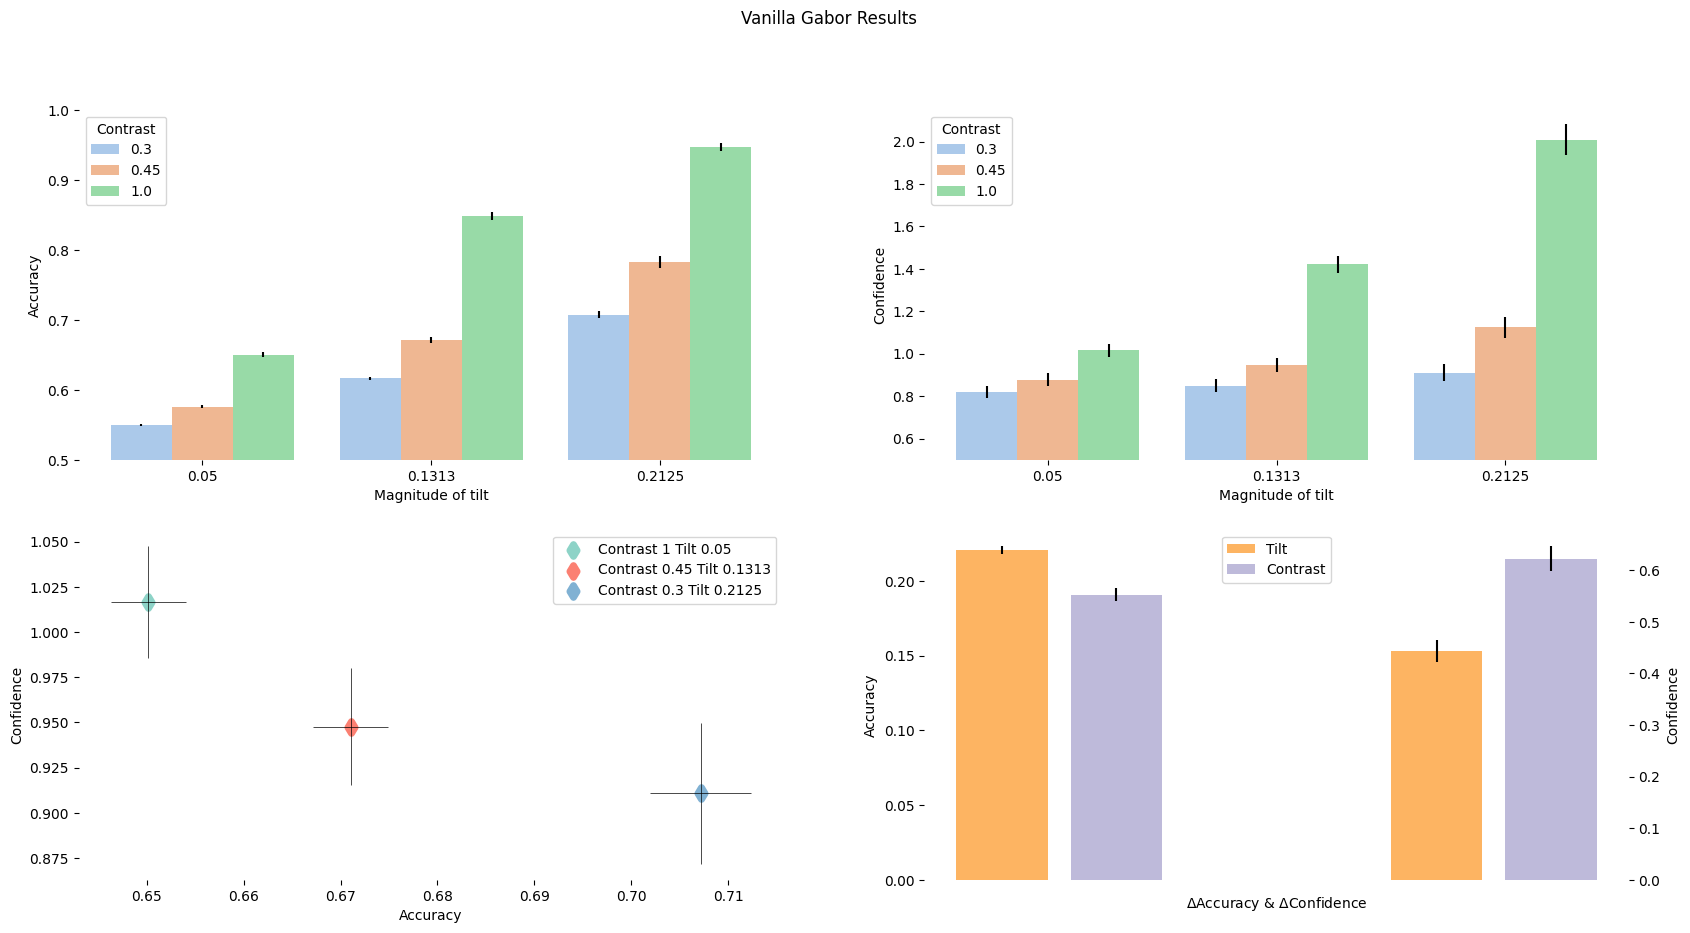

In [15]:
#sns.set_theme(style="whitegrid")
matplotlib.rc_file_defaults() #reset defaults
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10)) #set up canvas
sns.despine(fig, left=True, bottom=True)
mean_acc = draw_fig1a(df_van_gabor, sem_acc, ax1)
mean_conf = draw_fig1b(df_van_gabor, sem_conf, ax2)
draw_fig1c(ax1, ax2, mean_acc, mean_conf)
draw_fig1d(df_fig1d, ax4)
fig.suptitle('Vanilla Gabor Results')
#plt.tight_layout()
#plt.savefig('fig1-van_gabor.png', transparent=True, dpi=300)